In [1]:
from util import *


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [2]:
query = """WITH 
T1 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_ALY_CUSTOMER_CDE_01122023),
T2 AS (
    SELECT * FROM CINS_FEATURE_STORE_REACTIVATED_01122023
    WHERE FTR_NM IN ('CASA_BAL_SUM_NOW', 'CASA_TXN_AMT_AVG_36M', 'CASA_TXN_AMT_SUM_36M', 'CASA_TXN_CT_12M', 'CASA_DAY_SINCE_LAST_TXN_CT_36M'))
    
SELECT T2.CUSTOMER_CDE, T2.FTR_NM, T2.FTR_VAL
FROM T2 INNER JOIN T1
ON T1.CUSTOMER_CDE = T2.CUSTOMER_CDE"""

In [3]:
aly = download_or_reload('data/ALY_REACT_12', query)

Len 280241


In [4]:
aly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280241 entries, 0 to 280240
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CUSTOMER_CDE  280241 non-null  object
 1   FTR_NM        280241 non-null  object
 2   FTR_VAL       280241 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


In [5]:
aly

,CUSTOMER_CDE,FTR_NM,FTR_VAL
0,12229730,CASA_BAL_SUM_NOW,2517
1,12229765,CASA_BAL_SUM_NOW,2626
2,12328206,CASA_BAL_SUM_NOW,1776
3,12328870,CASA_BAL_SUM_NOW,1
4,12614192,CASA_BAL_SUM_NOW,0
...,...,...,...
280236,9605146,CASA_TXN_CT_12M,1
280237,5570687,CASA_TXN_CT_12M,1
280238,9355621,CASA_TXN_CT_12M,1
280239,18538046,CASA_TXN_CT_12M,3


In [6]:
aly = aly.pivot(index='CUSTOMER_CDE', columns='FTR_NM', values='FTR_VAL')
aly

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
CUSTOMER_CDE,,,,
10000486,1475,17,10000,1
10000519,2000,1,2000,1
10001060,1000,4,1000,1
10001101,0,10,NaN,NaN
10001333,2550,29,1000,1
...,...,...,...,...
9998574,1500,2,1000,1
9998659,2548,7,1000,1
9998693,1046,1,121,1


In [7]:
for c in aly.columns:
    aly[c] = pd.to_numeric(aly[c],errors='coerce')

In [8]:
aly.dtypes

FTR_NM
CASA_BAL_SUM_NOW                  float64
CASA_DAY_SINCE_LAST_TXN_CT_36M      int64
CASA_TXN_AMT_SUM_36M              float64
CASA_TXN_CT_12M                   float64
dtype: object

In [9]:
aly.describe()

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
count,7.190000e+04,74182.000000,6.745900e+04,66700.000000
mean,6.056599e+05,22.165337,3.948770e+07,2.458381
std,2.519600e+07,122.977688,1.938119e+09,9.355301
min,0.000000e+00,1.000000,1.000000e+00,1.000000
25%,1.000000e+03,1.000000,1.000000e+03,1.000000
50%,2.000000e+03,5.000000,2.101000e+03,1.000000
75%,1.000000e+04,12.000000,1.010055e+05,1.000000
max,5.002733e+09,1095.000000,3.600000e+11,1017.000000


<Axes: xlabel='CASA_TXN_AMT_SUM_36M', ylabel='Density'>

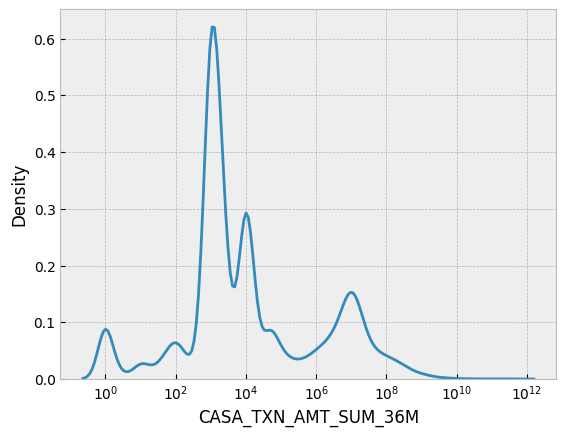

In [10]:
sns.kdeplot(aly['CASA_TXN_AMT_SUM_36M'], log_scale=True)


<Axes: xlabel='CASA_TXN_AMT_SUM_36M', ylabel='Count'>

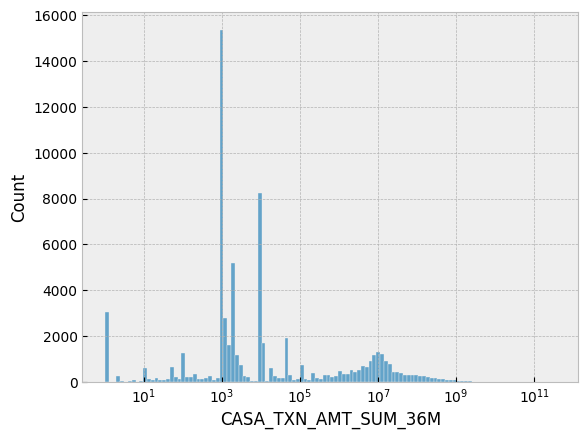

In [11]:
sns.histplot(aly['CASA_TXN_AMT_SUM_36M'], log_scale=True)

In [12]:
aly[aly['CASA_TXN_AMT_SUM_36M'].notnull()]

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
CUSTOMER_CDE,,,,
10000486,1475.0,17,10000.0,1.0
10000519,2000.0,1,2000.0,1.0
10001060,1000.0,4,1000.0,1.0
10001333,2550.0,29,1000.0,1.0
10001947,3600.0,22,2000.0,1.0
...,...,...,...,...
9998556,1500.0,18,1000.0,1.0
9998574,1500.0,2,1000.0,1.0
9998659,2548.0,7,1000.0,1.0


In [13]:
aly[aly['CASA_TXN_CT_12M'].notnull()]

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
CUSTOMER_CDE,,,,
10000486,1475.0,17,10000.0,1.0
10000519,2000.0,1,2000.0,1.0
10001060,1000.0,4,1000.0,1.0
10001333,2550.0,29,1000.0,1.0
10001947,3600.0,22,2000.0,1.0
...,...,...,...,...
9998556,1500.0,18,1000.0,1.0
9998574,1500.0,2,1000.0,1.0
9998659,2548.0,7,1000.0,1.0


<Axes: xlabel='CASA_TXN_CT_12M', ylabel='Count'>

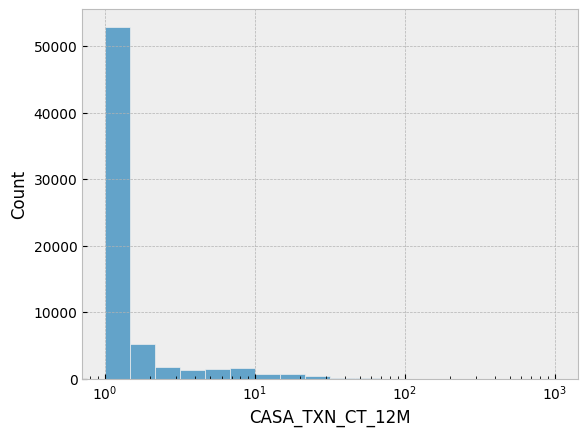

In [14]:
sns.histplot(aly['CASA_TXN_CT_12M'], log_scale=True)

<Axes: xlabel='CASA_TXN_CT_12M', ylabel='CASA_TXN_AMT_SUM_36M'>

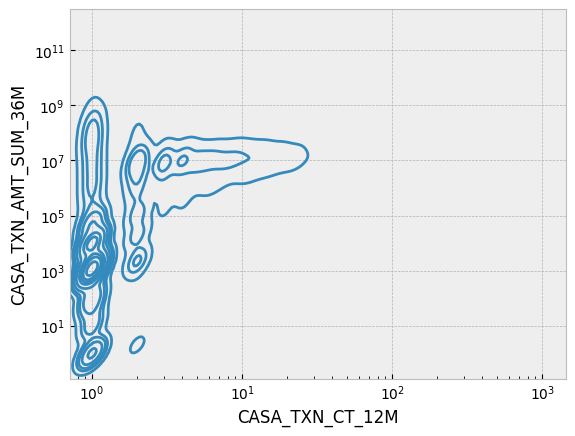

In [15]:
sns.kdeplot(aly, x='CASA_TXN_CT_12M', y='CASA_TXN_AMT_SUM_36M', log_scale=True)

In [16]:
aly['CASA_DAY_SINCE_LAST_TXN_CT_36M'].value_counts()

1      21868
10      9028
2       7398
3       3646
4       3615
       ...  
767        1
512        1
457        1
641        1
488        1
Name: CASA_DAY_SINCE_LAST_TXN_CT_36M, Length: 70, dtype: int64

<Axes: xlabel='CASA_DAY_SINCE_LAST_TXN_CT_36M', ylabel='Count'>

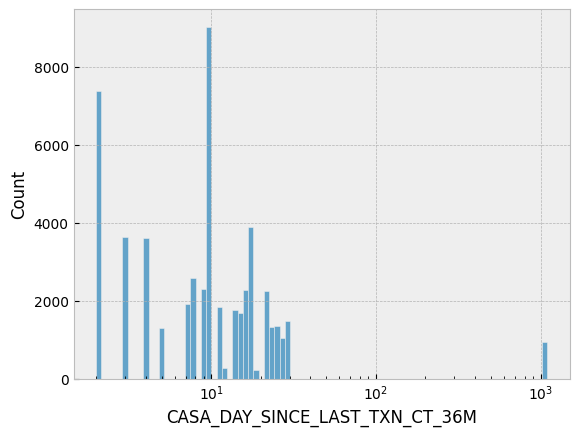

In [17]:
sns.histplot(aly[aly['CASA_DAY_SINCE_LAST_TXN_CT_36M']>1], x='CASA_DAY_SINCE_LAST_TXN_CT_36M', log_scale=True)